# Gene vs Tumor type Heatmap for Candidate Genes 

In [1]:
source("~/bin/da.R")

In [2]:
save_pheatmap <- function(x, filename, width=800, height=1200) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   svg(filename, pointsize = 300 )
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [3]:
k = read.csv("../HMaps/KCPG_wo_AR_gene_vs_tt.tsv", sep="\t")
kmat = as.matrix( k[-1] )
rownames(kmat) = k[,1]
kmat_x = kmat[,!grepl( 'OST|All', colnames(kmat))]
kmat_x = kmat_x[,c("ACT","RB","OS","STS","WLM","EWS", "GCT","HGG","LGG","CNS", "NBL","RHB")]

In [4]:
s = read.csv("../HMaps/suggesting_gene_vs_tt.tsv", sep="\t")
smat = as.matrix( s[-1] )
rownames(smat) = s[,1]
smat = smat[,colnames(kmat_x)]

In [5]:
smat %>% dim

[1] 1175   12

In [6]:
smat %>% head

,ACT,RB,OS,STS,WLM,EWS,GCT,HGG,LGG,CNS,NBL,RHB
PRKN,0,2.040816,2.3255814,1.075269,2.8985507,0.000000,1.351351,0.00,0.000000,1.547988,2.1052632,0.000000
TTN,0,1.020408,0.7751938,1.075269,1.4492754,3.157895,0.000000,0.00,0.000000,1.238390,1.5789474,0.000000
PAH,0,1.020408,0.0000000,0.000000,0.4830918,3.157895,0.000000,0.00,4.166667,1.547988,1.0526316,1.492537
TYR,0,1.020408,0.0000000,1.075269,1.4492754,0.000000,1.351351,2.50,0.000000,1.238390,1.5789474,1.492537
EYS,0,3.061224,0.7751938,1.075269,0.9661836,2.105263,0.000000,1.25,0.000000,1.238390,0.0000000,1.492537
TMPRSS3,0,3.061224,0.0000000,3.225806,0.9661836,0.000000,2.702703,0.00,0.000000,1.547988,0.5263158,0.000000


# Subset of genes

In [7]:
gene_list = read.csv("../suggeting_genes.txt", header=0)$V1
gene_list = as.char(gene_list)

In [8]:
gene_list %>% len

[1] 48

In [9]:
smat %>% dim

[1] 1175   12

In [10]:
smat[intersect(rownames(smat), gene_list),]  %>% dim

[1] 48 12

In [11]:
smat_48 = smat[intersect(rownames(smat), gene_list),]

In [12]:
smat_48_x = smat_48[,c("ACT","RB","OS","STS","WLM","EWS", "GCT","HGG","LGG","CNS", "NBL","RHB")]

In [13]:
smat_48_x %>% dim

[1] 48 12

In [15]:
# smat_48_x

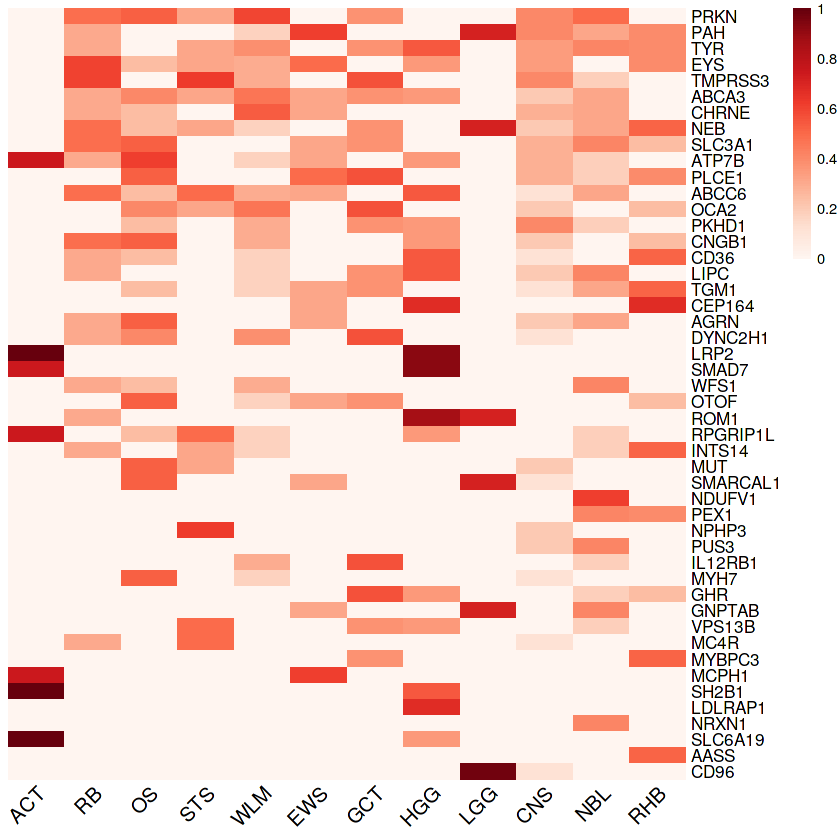

In [16]:
#ofp="../HMaps/Suggesting_HM/suggesting_gene_vs_tt_log_red_06072019.svg"
cols = colorRampPalette(c("#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"))(100)
breaksList = seq(0, 1, by = 0.01)
x = pheatmap(log10( smat_48_x +1 ), 
         cluster_cols = F, 
         cluster_rows = F,
         border_color = NA,
         color =cols,
         angle_col=45,
         fontsize = 8.5,
         fontsize_row=10,
         fontsize_col = 12,
         breaks=breaksList )
#save_pheatmap(x,ofp)

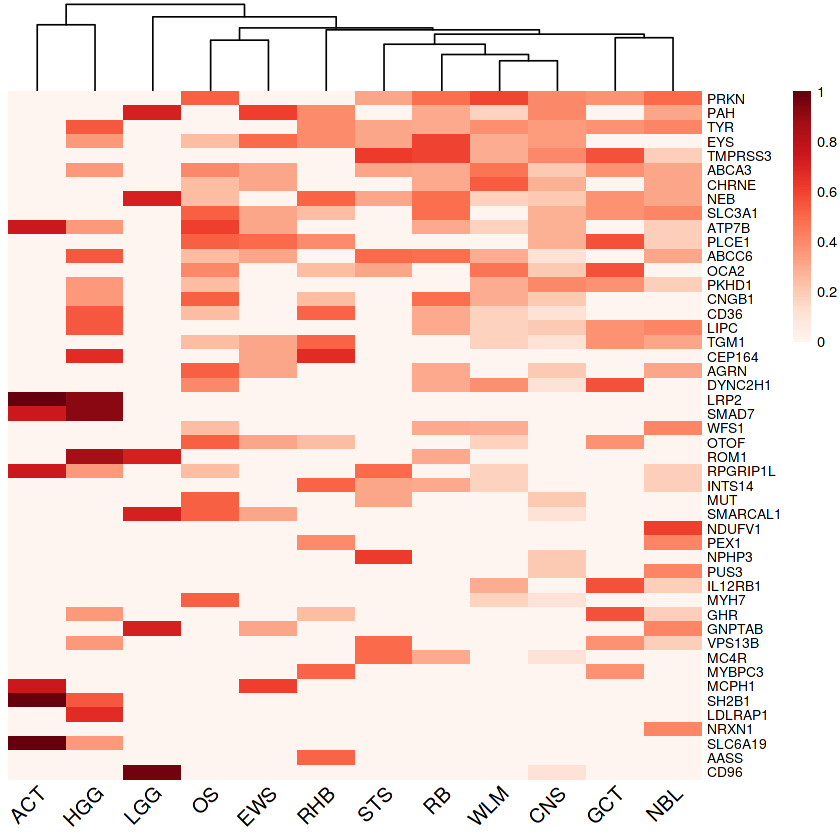

In [17]:
#ofp="../HMaps/Suggesting_HM/suggesting_gene_vs_tt_log_red_06072019_cluster_HM.svg"
cols = colorRampPalette(c("#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"))(100)
breaksList = seq(0, 1, by = 0.01)

x=pheatmap(log10(smat_48_x + 1),
           cluster_cols = T, 
           cluster_rows = F,
           border_color = F,
           color =cols,
           angle_col=45,
           fontsize = 8.5,
           fontsize_row=8,
           fontsize_col = 12,
           breaks=breaksList)
#save_pheatmap(x, ofp)